In [1]:
import sys
import os
import torch

from torch_geometric.datasets import MoleculeNet
from torch_geometric.loader import DataLoader
from torch_geometric.data import Data, Dataset, DataLoader, Batch
from ogb.utils import smiles2graph
# add the parent directory of note book to sys.path to import the models
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from models import EGNNModel, MACEModel

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
def prep_input(smiles, pos=None):
    datalist = []
    for xyz in pos:
        graph = smiles2graph(smiles)
        if pos is not None:
            graph['pos'] = xyz  
        #print('Number of atoms:', graph['node_feat'].shape[0])
        data = Data(
            atoms=torch.from_numpy(graph['node_feat'][:, 0]), 
            edge_index=torch.from_numpy(graph['edge_index']), 
            edge_attr=torch.from_numpy(graph['edge_feat']), 
            pos=graph['pos'],).to(device)
        data.validate(raise_on_error=True)
        datalist.append(data)
    batch = Batch.from_data_list(datalist)
    return batch

In [3]:
pos = torch.rand(32, 22, 3).to(device)
smiles = 'C[C@@H](C(=O)NC)NC(=O)C'
batch = prep_input(smiles, pos)

In [4]:
model = MACEModel(in_dim=66, out_dim=66, mlp_dim=256, equivariant_pred=True, smiles=smiles).to(device)

/home/radoslavralev/miniconda3/envs/free-flow/lib/python3.11/site-packages/torch/jit/_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(
/home/radoslavralev/miniconda3/envs/free-flow/lib/python3.11/site-packages/torch/jit/_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(
/home/radoslavralev/miniconda3/envs/free-flow/lib/python3.11/site-packages/torch/jit/_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `t

Number of parameters: 1860074


/home/radoslavralev/miniconda3/envs/free-flow/lib/python3.11/site-packages/torch/jit/_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(
/home/radoslavralev/miniconda3/envs/free-flow/lib/python3.11/site-packages/torch/jit/_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(
/home/radoslavralev/miniconda3/envs/free-flow/lib/python3.11/site-packages/torch/jit/_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `t

In [5]:
model(pos)

tensor([[ -2.3833,  -9.4362,   1.9978,  ...,  14.1675,  14.4089, -14.4062],
        [  7.9449,  -2.4369, -13.9490,  ...,   6.1761,  -0.0815, -16.3310],
        [ -2.1279,   3.5789,  14.8212,  ...,   3.2476,   3.7555,  -7.1383],
        ...,
        [-16.9564,   2.6051,  39.7467,  ...,  -5.9711,  -7.2475, -27.0061],
        [ -2.7491,  -8.6888,   6.2775,  ...,  -7.9569,  -5.7985, -27.8518],
        [ -1.2158,  -0.0634,  -0.4817,  ...,   1.1393,  -4.9307,   6.3182]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [6]:
from rdkit import Chem

m = Chem.MolFromSmiles(smiles)
m_w = Chem.AddHs(m)

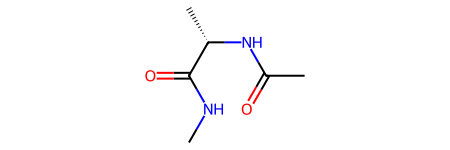

In [7]:
m

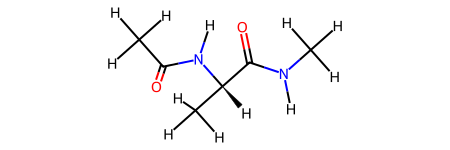

In [8]:
m_w

In [9]:
[x.GetSymbol() for x in m_w.GetAtoms()]

['C',
 'C',
 'C',
 'O',
 'N',
 'C',
 'N',
 'C',
 'O',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H']